In [1]:
#data analysis and wrangling 데이터 분석, 논쟁
import pandas as pd
import numpy as np
import random as rnd

#visualization 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#판다스로 트레이닝,테스트 데이터셋 챙기기. 연산에 따라 맞는 결합
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
#preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mack, Mrs. (Mary)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [9]:
# 분류. 생존과 관계 높은 특징 상관관계

# 완료1. 나이특징 빈 값 채우기(생존과 상관관계 조사)
# 완료2. Embarked 특징 채우기.

# 정정1. Ticket은 중복 비율 22퍼센트고 생존이랑 상관 없을 거 같아 뺌.
# 정정2. Cabin은 데이터 적고 널 많아서 드랍
# 정정3. PassengerId는 생존에 기여하지 않아 드랍.
# 정정4. Name은 생존에 관련되지 않아 드랍.

# 창조1. Family 특징
# 창조2. Name 변형
# 창조3. 나이 범주형 변수
# 창조4. 운임 범주형 변수(분석에 도움)

# 분류1. (기존 노트 내용 기준) 여성이 더 많이 살았다.
# 분류2. 어린이가 더 많이 살았다.
# 분류3. 상위 클래스가 더 많이 살았다.

# 추측대로 특징을 조작하여 분석
# 관측, 추측 확인하려면 상관 관계 분석할 수 있음.
# 범주형, 연속형, 이산 타입
# 클래스 1, 생존여부 상관계수 0.5 이상. - Pclass
# 여자가 74퍼센트 살았다는 얘기 같음 - Sex
# 상관계수 0, 파생 필요 - SibSp, Parch

In [10]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["Sex","Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# SibSp는 동승 형제자매, 배우자 수

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch","Survived"]].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
# 시각화 데이터로 분석
# 숫자형(numerical) 독립변수들의 상관관계 분석
# 히스토그램 차트가 연속적 숫자형 변수들(나이 등) 분석에 적합함.
# 히스토그램은 자동 정의된 bin들이나 범주화 밴드들로  분포를 표시할 수 있다
# 이는 특정 밴드에 질문을 표할 수 있다.
# 예시: 아기들의 생존율이 더 좋은가?

In [15]:
# [관측]
# 아기들은 높은 생존율을 기록함
# 최고령(80) 생존함.
# 15~25살대 승객들이 제일 만힝 죽음
# 대부분 승객들이 15~35살.

# [결정]
# 우리의 모델을 트레이닝할 때 나이를 고려해야겠다. (분류2)
# 나이 독립변수의 null 값을 채우자.
#. 우리는 나이 그룹을 형성해야 한다. (창조3)

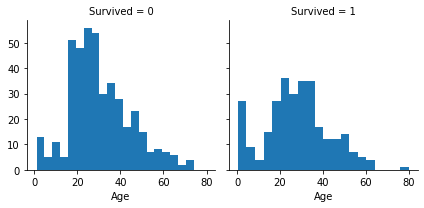

In [16]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

In [17]:
# 그래프 내 다수 특징 결합으로 상관관계 정의 가능
# Pclass를 모델 훈련 시 고려하자.

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


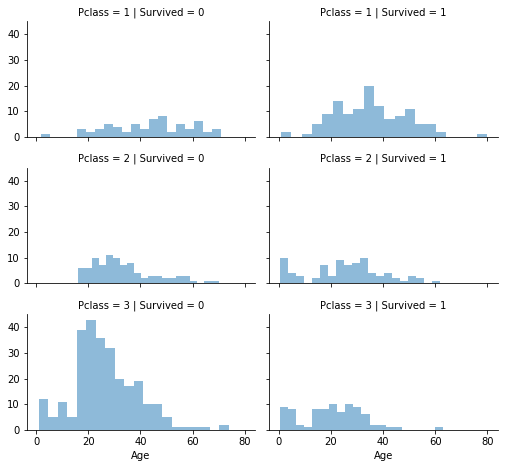

In [18]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend();

In [19]:
# 성별 피쳐 추가.
# 승선 피쳐 완성, 추가.

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


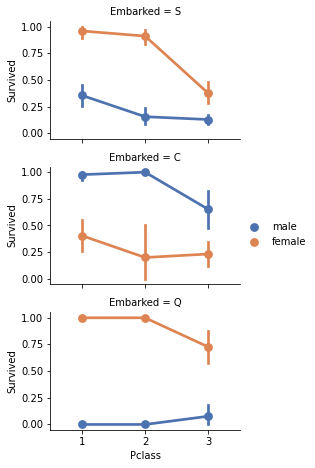

In [20]:
grid=sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

In [21]:
# 범주형, 연속형 변수 결합.
# 범주형(non_numeric / numeric)

# 관측
# 요금 많이 낸 사람들이 더 살음
# 탑승 포트와 생존율이 상관관계가 있음.

# 결정
# 요금 피쳐 밴딩 고려

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


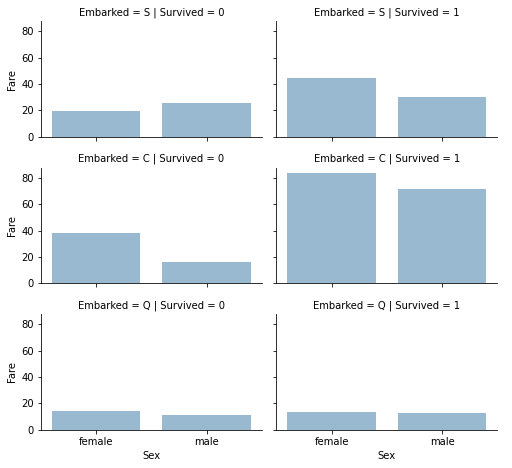

In [22]:
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [23]:
# 데이터 논쟁-수정,창조,목표 완료 위한 가정&결정 수행
# 피쳐 드랍을 통한 데이터 수정(속도 개선)
# Cabin, Ticket 피쳐 드랍

print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]

print("After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [24]:
# Title 피쳐 만들기. (이름 . 앞에까지). RegEx 패턴
# 관측
# 거의 모든 타이틀들이 age 밴딩 정확히 함.
# Survival, Title age 밴드 약간 다름.

In [25]:
# Mme,Lady,Sir 많이 살음, Don,Rev,Jonkheer 많이 죽음.
# 결정
# 타이틀 피쳐를 모델 훈련에 사용하자.

In [26]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    # expand 옵션이 False면 데이터 프레임 반환
    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
# 우리는 많은 타이틀들을 흔한 이름으로 대체하거나 그들을 Rare로 분류할 수 있다.

for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                                              'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [28]:
# 카테고리형 타이틀을 순서형으로 바꾸기.

title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [29]:
# 이제 안전히 Name feature 트레이닝,테스트 데이터에서 드랍 가능.
# 트레이닝 데이터 내 PassengerId 피쳐도 필요없음.

train_df=train_df.drop(['Name','PassengerId'],axis=1) # 열 방향
test_df=test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [30]:
# String 형을 포함하는 피쳐를 numerical 값으로 변환.
# 성별 피쳐를 Gender(female=1,male=0)라는 새로운 피쳐로 변환.

for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [31]:
# 피쳐들 평가, missing&null 값 완성
# Age 피쳐부터.

# 연속적 숫자 피쳐 완성하는 3가지 메소드
# 1. 평균~표준편차 사이 랜덤 난수 발생시키기.
# 2. 다른 상관관계 변수 이용.
# 우리 경우 Age,Gender,Pclass 상관관계 볼 거임.
# Pclass와 Gender 피쳐 콤비네이션에 대한 Age across 셋 이용해서 Age values 추정.
# 3. 1번과 2번 방법 결합.
# Pclass,Gender 콤비네이션 세트의 평균~표준편차 사이 난수 발생으로 Age values 추정.

# 1번과 3번 방법은 우리 모델에 랜덤 노이즈를 줌.
# 여러가지 집행들에 따른 결과는 아마 변이가 있을 거임.
# 우리는 2번 방법을 사용함.

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


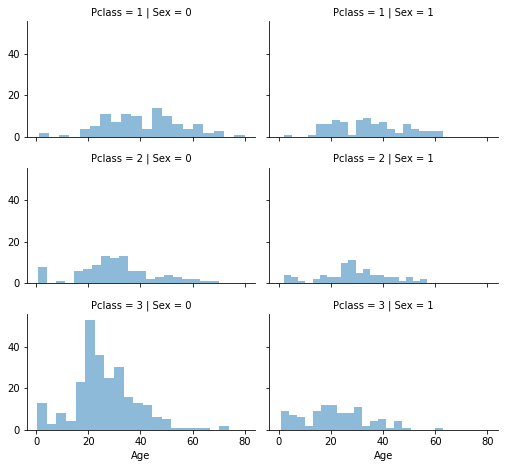

In [32]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [33]:
# Pclass,Gender 콤비네이션을 기반으로 한 Age value 추정 값 넣기 위한 empty array

guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
# 6개 콤비네이션들로 추정된 Age값을 계산하기 위해 Sex(0 또는 1), Pclass(1,2,3) 반복 가능

for dataset in combine:
    for i in range(0,2): # 0,1
        for j in range(0,3): # 0,1,2. 밑에 1 더하면 1,2,3 됨
            guess_df=dataset[(dataset['Sex']==i)&\
                            (dataset['Pclass']==j+1)]['Age'].dropna()
            
            age_guess=guess_df.median()
            
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1),\
                       'Age']=guess_ages[i,j]
            #loc()= 판다스 특정 행 찾기 위한 함수.
            
    dataset['Age']=dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [35]:
# Age 밴드 생성, Survived 상관 관계 결정

train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [36]:
# AgeBand 기준으로 Age 순서형으로로 재배치.

for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [37]:
train_df=train_df.drop(['AgeBand'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [38]:
# Parch,SibSp 결합 > 새로운 FamilySize 피쳐 생성
# SibSp=동승 형제자매, 배우자 수.
# Parch=동승 부모, 자녀 수
# FamilySize 피쳐 생성 시 데이터셋에서 Parch,SibSp 드랍 가능

for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
# IsAlone 피쳐 생성

for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
# Parch,SibSp,FamilySize 드랍.

train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [41]:
# Pclass,Age 결합

for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass
    
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [42]:
# 카테고리형 피쳐 완성
# Embarked는 2개의 missing values 보유.
# 제일 빈도수 높은 값으로 채우기.

freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [43]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# ascending : 오름차순

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [44]:
# 범주형 피쳐 > 숫자형 피쳐
# EmbarkedFill 피쳐를 새로운 숫자형 포트 피쳐 생성을 통해 변환함.

for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [45]:
# 퀵 숫자형 피쳐 완성, 변환
# 테스트 데이터 내 Fare 피쳐 missing value 하나를 빈도수가 가장 높은 값으로 채움.

# Fare 소수점 둘째 자리로 반올림.

test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [46]:
train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
# FareBand 기준 Fare 피쳐 순서형으로 변환

for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)
    
train_df=train_df.drop(['FareBand'],axis=1)
combine=[train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [48]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [49]:
# 모델링, 예측, 해결
# 필수적인 모델 훈련, 예측을 진행할 수 있음.
# 60개 이상의 예측 모델 알고리즘이 있음.
# 문제의 유형에 대해, 솔루션의 요구사항에 대해 이해하고 여러 모델들을 평가해서 선택폭을 좁혀야 함.
# 분류, 회귀.
# 우리는 다른 변수들 또는 특성들과 생존율 간의 관계를 식별하고자 함.
# 주어진 데이터로 지도학습.
# 지도학습, 분류&회귀 기준으로 모델 선택폭 좁힐 수 있음.
# 로지스틱 회귀, K-평균, SVM, 나이브베이즈 분류, 결정트리, 랜덤 포레스트, 퍼셉트론,
# 인공 신경망, RVM

In [50]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]
X_test=test_df.drop("PassengerId",axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

In [51]:
# 로지스틱 회귀는 워크플로우에서 일찍 쓰기 좋음.
# 로지스틱 회귀는 로지스틱 함수(로지스틱 누적 분산)를 이용한 확률 추정을 통해 카테고리형 종속 변수와 1개 이상 독립 변수들 간의 관계를 계량한다.

# 로지스틱 회귀
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

80.36

In [52]:
# 로지스틱 회귀로 우리의 피쳐 생성과 목표 도달을 위한 가정과 결정을 확인할 수 있다.
# 이것은 결정 함수 내 피쳐들의 계수 연산으로 수행될 수 있다.
# Positive 계수는 응답의 log-승산을 증가시킨다. (그러므로 개연성도 증가)
# Negative 계수는 응답의 log-승산을 하강시킨다. (그러므로 개연성도 하강)

# 성별은 높은 Positive 계수다. 이가 증가하면 Survived=1도 증가.
# 반대로 Pclass가 증가하면 Survived=1이 감소한다.
# Age*Class는 모델에게 좋은 인공 특성이다. 2번째로 Negative한 Survived와의 상관관계를 보유하고 있기 때문에.

coeff_df=pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df["Correlation"]=pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [53]:
# 분류, 회귀 알고리즘들과 관련있는 서포트 벡터 머신.(지도학습)
# 1 또는 다른 2 카테고리들로 마크된 트레이닝 샘플들이 주어지면
# SVM 트레이닝 알고리즘이 새로운 테스트 샘플들을 할당하는 비확률론적 이진 선형 분류 모델을 건축한다.

svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

78.23

In [54]:
# 패턴인식에서 K-근접 이웃 알고리즘(k-NN)은 분류와 회귀에 쓰이는 non-parametric 메소드다.
# 샘플은 이웃들의 과반수 vote와 주변에서 제일 일반적인 class로 인해 분류된다.
# k는 positive 정수, 일반적으로 작다.
# k가 1이라면 object는 단순히 가까운 한 이웃 클래스에 할당된다.
# confidence score는 로지스틱 회귀보다 좋지만 SVM보단 딸린다.

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

84.74

In [55]:
# 머신러닝에서 나이브 베이즈 분류는 베이즈 이론과 features에 대한 비종속적 가정을 기반으로 한 심플 확률론적 분류자들의 가족이다.
# 나이브 베이즈 분류기들은 확장성이 높고, 학습 문제에 관련된 선형 숫자 변수 parameters를 필요로 한다.

gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

72.28

In [56]:
# 퍼셉트론은 이진 분류의 지도학습(input이 어떤지에 따라 함수 결정, 벡터들로 설명하고, 특정 클래스에 속해있거나 속해있지 않음) 알고리즘이다.
# 선형 분류기중 하나다. 즉 가중치들과 feature 벡터를 합치는 선형 예측 함수를 기반으로 한 예측을 만드는 분류 알고리즘이다.
# 한 번에 한 트레이닝 세트 element들을 처리하는 온라인 러닝에 허용되는 알고리즘.

perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

78.34

In [57]:
# 선형 SVC

linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred=linear_svc.predict(X_test)
acc_linear_svc=round(linear_svc.score(X_train,Y_train)*100,2)
acc_linear_svc

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.01

In [58]:
# 확률적 경사 하강법(Stochastic Gradient Descent)

sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

74.64

In [59]:
# 예측 모델로 features를 결정들(타겟 값, 트리 잎)로 매핑하는 결정 트리 사용.
# 타겟 변수가 한정된 value 세트를 취할 수 있는 트리 모델을 분류 트리라고 부른다.
# 이 트리 구조에서는, 잎이 클래스 라벨을 말하며 가지는 클래스 라벨(잎)과 이어진 feature들의 연결을 말한다.
# 타겟 변수가 연속적인 values를 취할 수 있는 트리 모델을 회귀 트리라고 한다.

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.76

In [61]:
# 다음 모델은 유명한 것들 중 하나인 랜덤 포레스트다.
# 랜덤 포레스트(랜덤 결정 포레스트)는 트레이닝 시 여러 개인적 의사 결정트리를 건축함으로써(n_estimators=100)
# 분류(클래스들의 모드 출력) 회귀(예측 평균) 작업에 사용되는 앙상블 학습

# 모델 설명 score가 지금까지 평가한 모델 중 가장 높음.
# 이 모델을 대회 결과 제출에 사용하겠음.

random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.76

In [64]:
# 모델 평가
# 이제 우리의 문제에 가장 좋은 모델을 선택하기 위해 모든 모델의 평가를 랭킹함.
# 결정 트리, 랜덤 포레스트 점수는 비슷,
# 결정 트리의 트레이닝 셋 오버피팅에 대한 습관 수정 시 랜덤 포레스트 사용.

models=pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Logistic Regression',
                             'Random Forest', 'Naive Bayes', 'Perceptron',
                             'Stochastic Gradient Decent', 'Linear SVC',
                             'Decision Tree'],
                    'Score':[acc_svc, acc_knn, acc_log, acc_random_forest,
                            acc_gaussian, acc_perceptron, acc_sgd,
                            acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,74.64
4,Naive Bayes,72.28


In [66]:
submission=pd.DataFrame({"PassengerId":test_df["PassengerId"],
                        "Survived":Y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [67]:
# 출처 https://www.kaggle.com/startupsci/titanic-data-science-solutions